# Titanic

## Initial Data Processing

#### Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Data/titanic_train.csv')
data = data.drop('PassengerId', axis=1)
data.head().append(data.tail())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


#### Initial Data Cleaning

In [3]:
# null values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Explore Data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Numerical Variables

In [5]:
num_cols = [cname for cname in data.columns
                  if data[cname].dtype in ['int64', 'float64']]
num_cols.remove('Pclass')

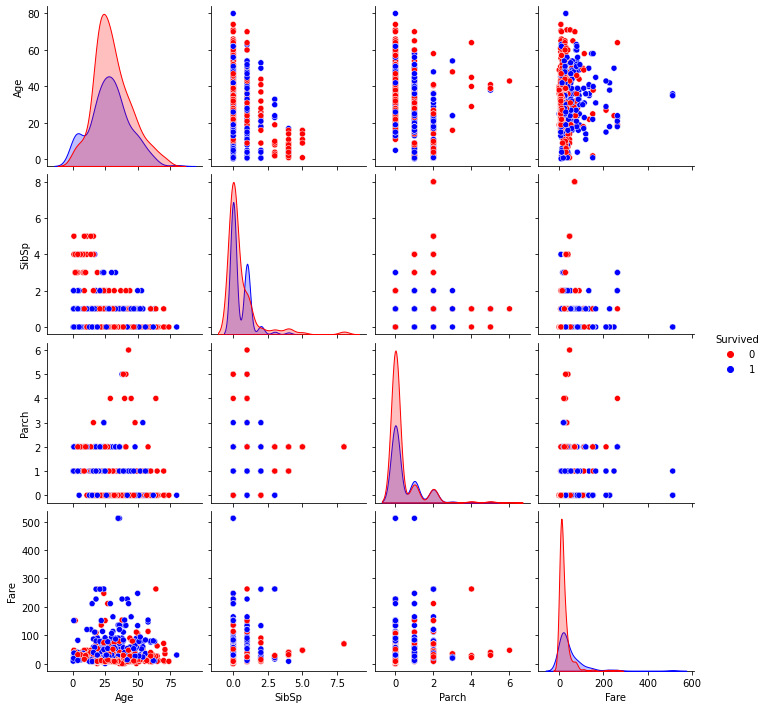

In [6]:
sns.pairplot(data[num_cols], hue = 'Survived', palette=["r", "b"])

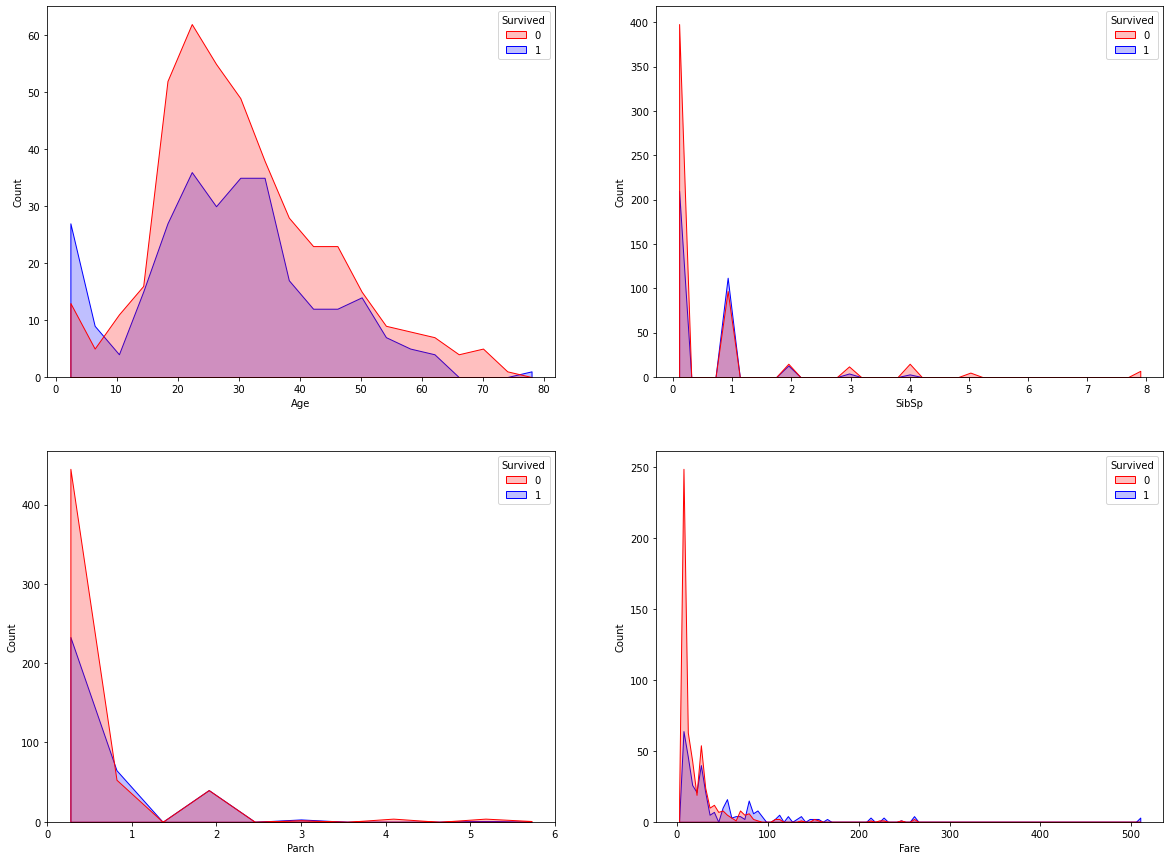

In [7]:
num_cols.remove('Survived')
plt.figure(figsize = (20,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.histplot(x = i[1], hue='Survived', data=data, element='poly', palette=["r", "b"])

In [8]:
"""
# view outliers
plt.figure(figsize = (20,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data[i[1]])   
"""

'\n# view outliers\nplt.figure(figsize = (20,15))\nfor i in enumerate(num_cols):\n    plt.subplot(2,2,i[0]+1)\n    sns.boxplot(data[i[1]])   \n'

#### Missing Numerical Values

In [9]:
from sklearn.impute import SimpleImputer

# define imputer model
imputer = SimpleImputer(strategy = 'mean')

# fit & transform
num_imputed = pd.DataFrame(imputer.fit_transform(data[num_cols]))

# add imputed columns back to data
data[num_cols] = num_imputed

#### Process Numerical Outliers *(not today)*

In [10]:
'''
# set upper and lower limits
upper_limit = 0.99
lower_limit = 1 - upper_limit

# columns to remove outliers from
out = ['Fare']

for i in enumerate(out):
    # find upper and lower
    upper = data[i[1]].quantile(upper_limit)
    lower = data[i[1]].quantile(lower_limit)
    # view omissions 
    display(data[data[i[1]] < lower].append(data[data[i[1]] > upper]))
    # remove from data
    data = data[(data[i[1]] > lower) & (data[i[1]] < upper)]
'''

"\n# set upper and lower limits\nupper_limit = 0.99\nlower_limit = 1 - upper_limit\n\n# columns to remove outliers from\nout = ['Fare']\n\nfor i in enumerate(out):\n    # find upper and lower\n    upper = data[i[1]].quantile(upper_limit)\n    lower = data[i[1]].quantile(lower_limit)\n    # view omissions \n    display(data[data[i[1]] < lower].append(data[data[i[1]] > upper]))\n    # remove from data\n    data = data[(data[i[1]] > lower) & (data[i[1]] < upper)]\n"

In [11]:
'''
# view processed distributions with outliers removed
plt.figure(figsize = (20,15))
for i in enumerate(out):
    plt.subplot(2,2,i[0]+1)
    sns.histplot(x = i[1], hue='Survived', data=data, element='poly', palette=["r", "b"])
'''

'\n# view processed distributions with outliers removed\nplt.figure(figsize = (20,15))\nfor i in enumerate(out):\n    plt.subplot(2,2,i[0]+1)\n    sns.histplot(x = i[1], hue=\'Survived\', data=data, element=\'poly\', palette=["r", "b"])\n'

#### Categorical Variables

In [12]:
# list object columns
obj_cols = [cname for cname in data.columns
                  if data[cname].dtype == 'object']
obj_cols.remove('Name')
obj_cols.remove('Ticket')
obj_cols.remove('Cabin')

# fill NaN with NA
data[obj_cols] = data[obj_cols].fillna('NA')

In [13]:
for col in data[obj_cols]:
    print(str(data[obj_cols][col].value_counts()) + "\n")

male      577
female    314
Name: Sex, dtype: int64

S     644
C     168
Q      77
NA      2
Name: Embarked, dtype: int64



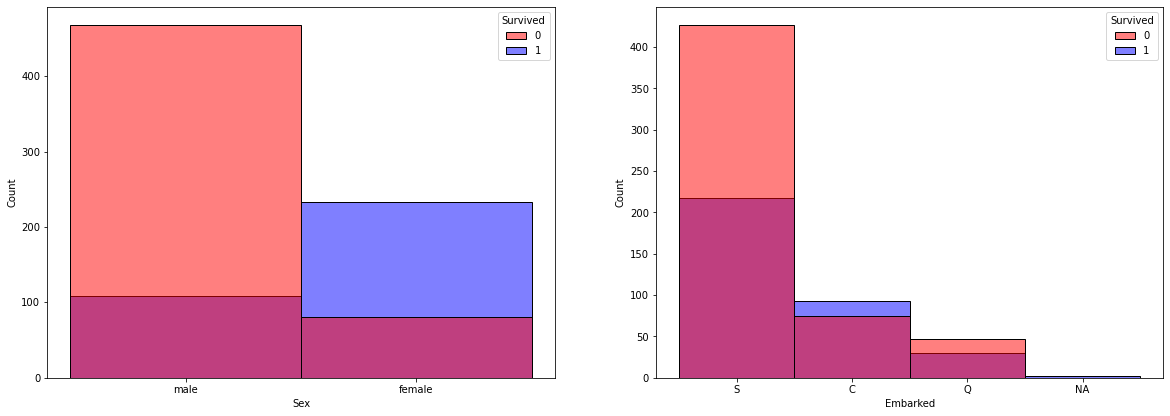

In [14]:
plt.figure(figsize = (20,15))
for i in enumerate(obj_cols):
    plt.subplot(2,2,i[0]+1)
    sns.histplot(x = i[1], hue='Survived', data=data, palette=["r", "b"])

#### Missing Categorical Columns

In [15]:
# define imputer model
imputer = SimpleImputer(missing_values = 'NA', strategy = 'most_frequent')

# fit & transform
obj_imputed = pd.DataFrame(imputer.fit_transform(data[obj_cols]))

# add imputed columns back to data
data[obj_cols] = obj_imputed

#### Ordinal Encoding *(not today)*

In [16]:
"""

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

# ordinal encoder fit & transform
data[obj_cols] = ordinal_encoder.fit_transform(data[obj_cols])

"""

'\n\nfrom sklearn.preprocessing import OrdinalEncoder\n\nordinal_encoder = OrdinalEncoder()\n\n# ordinal encoder fit & transform\ndata[obj_cols] = ordinal_encoder.fit_transform(data[obj_cols])\n\n'

#### Dummy Variables

In [17]:
data = pd.get_dummies(data, columns=['Sex'])

#### Variable Correlation

Text(0.5, 1.0, 'Correlation Map')

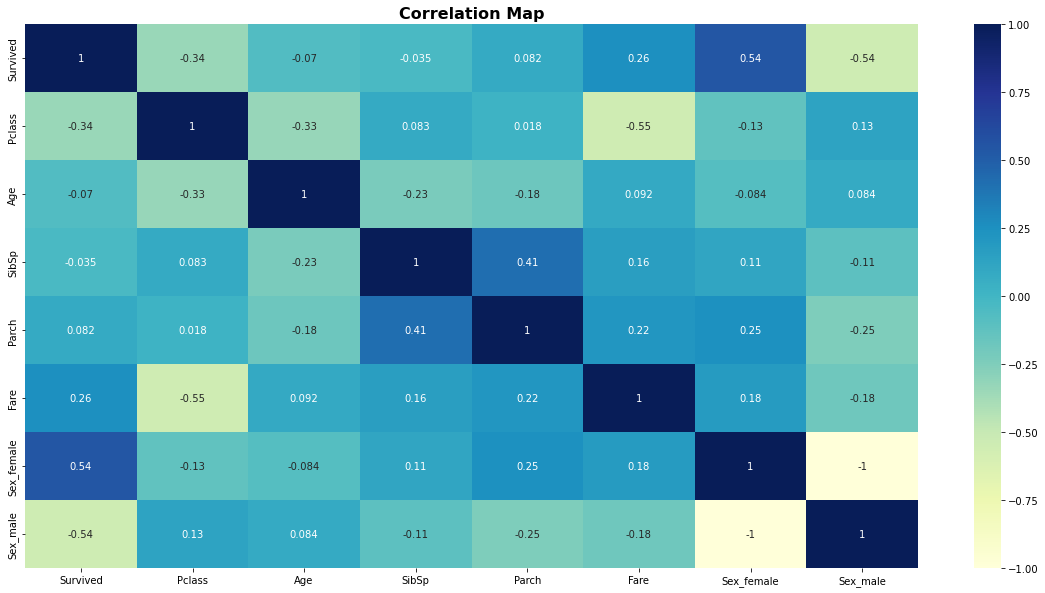

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.title("Correlation Map", fontweight = 'bold', fontsize=16)

***
# Modeling

## Logistical Regression

#### Define x & y Variables

In [19]:
x = data.filter(['Pclass', 'Age', 'Fare', 'Sex_female'], axis=1)
y = data['Survived']

#### Check Classification Balance

In [20]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f'Class={k}, n={v}, ({dist}%)')

Class=0, n=549, (61.61616161616161%)
Class=1, n=342, (38.38383838383838%)


#### Balance Dependent Variable Classification *(not today)*

In [21]:
'''
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
'''

'\nfrom imblearn.over_sampling import SMOTE\n\noversample = SMOTE()\nx, y = oversample.fit_resample(x, y)\n'

In [22]:
'''
# post check
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f'Class={k}, n={v}, ({dist}%)')
'''

"\n# post check\nfrom collections import Counter\ncounter = Counter(y)\nfor k, v in counter.items():\n    dist = v / len(y) * 100\n    print(f'Class={k}, n={v}, ({dist}%)')\n"

#### Train/Test Split

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#### Define Model

In [24]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter=1000, C=1e8)

#### Fit Model

In [25]:
LogReg.fit(x_train, y_train)

LogisticRegression(C=100000000.0, max_iter=1000)

#### *Will I Survive?*

In [26]:
# Will I Survive?

Pclass = 2
Age = 29
Fare = 117
Female = 0

LogReg.predict_proba(x.iloc[[100]])
if LogReg.predict_proba(np.array([[Pclass,Age,Fare,Female]]))[0][1] > 0.5:
    print("Yes with a " + str(LogReg.predict_proba(np.array([[Pclass,Age,Fare,Female]]))[0][1]) + " chance")
else:
    print("No with a " + str(1 - LogReg.predict_proba(np.array([[Pclass,Age,Fare,Female]]))[0][1]) + " chance")

No with a 0.7488980250077548 chance


In [27]:
# statsmodel trial
import statsmodels.api as sm
#x_train = sm.add_constant(x_train)

# define and fit
logit = sm.Logit(y_train, x_train).fit()

# summary
logit.summary()

Optimization terminated successfully.
         Current function value: 0.465447
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      592
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Dec 2021   Pseudo R-squ.:                  0.3029
Time:                        22:32:57   Log-Likelihood:                -277.41
converged:                       True   LL-Null:                       -397.92
Covariance Type:            nonrobust   LLR p-value:                 5.694e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6040      0.082     -7.370      0.000      -0.765      -0.443
Age           -0.0112      0.006     -1.821      0.069      -0.023       0.001
Fare           0.0050      0.002      2.172      0.030       0.000       0.010
Sex_female     2.6135      0.219     11.946      0.000       2.185       3.042
==============================================================================
"""

#### Gather Predictions and Add to Data

In [28]:
y_pred = LogReg.predict(x_test)
y_prob = LogReg.predict_proba(x_test)
x_test_p = x_test.copy()
x_test_p['Survived'] = y_test
x_test_p['pred'] = y_pred.tolist()
x_test_p['prob'] = y_prob[:,1].tolist()

#### *Probability Threshold (Optional)*

In [29]:
'''
threshold = 0.45
x_test_p['thresh_pred'] = 0
x_test_p.loc[x_test_p['prob'] > threshold, 'thresh_pred'] = 1
x_test_p.head()

# threshold confusion matrix
pd.crosstab(x_test_p['TARGET'], x_test_p['thresh_pred'])
'''

"\nthreshold = 0.45\nx_test_p['thresh_pred'] = 0\nx_test_p.loc[x_test_p['prob'] > threshold, 'thresh_pred'] = 1\nx_test_p.head()\n\n# threshold confusion matrix\npd.crosstab(x_test_p['TARGET'], x_test_p['thresh_pred'])\n"

In [30]:
'''
# add statsmodels comparison
x_test_p['sm_pred'] = [1 if x > 0.5 else 0 for x in logit.predict(x_test)]
x_test_p['sm_prob'] = logit.predict(x_test)
x_test_p
'''

"\n# add statsmodels comparison\nx_test_p['sm_pred'] = [1 if x > 0.5 else 0 for x in logit.predict(x_test)]\nx_test_p['sm_prob'] = logit.predict(x_test)\nx_test_p\n"

### Model Score

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

#### Cross-Validation

In [32]:
from sklearn.model_selection import cross_validate
cross_validate(LogReg, x, y, cv=6, scoring='f1_macro')

{'fit_time': array([0.014745  , 0.01600313, 0.01548219, 0.01566529, 0.01021409,
        0.01319194]),
 'score_time': array([0.00236893, 0.00255084, 0.00247312, 0.00217175, 0.00169301,
        0.0019362 ]),
 'test_score': array([0.77041602, 0.78856975, 0.806637  , 0.7540567 , 0.74957699,
        0.7829912 ])}

In [33]:
LogReg.score(x_test, y_test)

0.7898305084745763

#### Accuracy

In [34]:
accuracy_score(y_test, LogReg.predict(x_test))

0.7898305084745763

In [35]:
# Understanding Model Score / Accuracy
prediction = (LogReg.predict(x_test) > 0.5).astype(int)
np.sum(prediction == y_test) / len(y_test)

0.7898305084745763

#### R-Squared

In [36]:
r2_score(y_test, y_pred)

0.10448491970231111

#### Mean Squared Error

In [37]:
mean_squared_error(y_test, y_pred)

0.21016949152542372

#### Mean Absolute Error

In [38]:
mean_absolute_error(y_test, y_pred)

0.21016949152542372

#### Log Loss Score

In [39]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

7.25908109832135

#### Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[153,  31],
       [ 31,  80]])

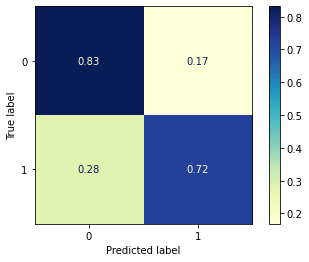

In [41]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(LogReg.fit(x_train, y_train), x_test, y_test,
                               cmap=plt.cm.YlGnBu,
                               normalize='true')

#### Feature Coefficients

In [42]:
coef = LogReg.coef_
feature_list = pd.DataFrame()
feature_list['Feature'] = x.columns.tolist()
feature_list['Coefficient'] = coef[0].T.tolist()

In [43]:
# sm coef
feature_list['sm_coef'] = logit.params.to_list()

#### Recursive Feature Elimination

In [44]:
from sklearn.feature_selection import RFE

rfe = RFE(LogReg, n_features_to_select=len(x)-2)
rfe_f = rfe.fit(x, y)
feature_list['RFE Rank'] = rfe_f.ranking_
feature_list['RFE Include'] = rfe_f.support_

#### Univariate Statistical Test

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

ust = SelectKBest(score_func=f_classif, k=len(x.columns))
ust_f = ust.fit(x, y)

feature_list['UST Score'] = ust_f.scores_

#### Principal Component Analysis

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(x.columns))
pca_f = pca.fit(x)

feature_list['PCA Explained Variance Ratio'] = pca_f.explained_variance_ratio_

#### Evaluate Features

In [47]:
feature_list

,Feature,Coefficient,sm_coef,RFE Rank,RFE Include,UST Score,PCA Explained Variance Ratio
0,Pclass,-1.100047,-0.603961,1,True,115.031272,0.936259
1,Age,-0.034042,-0.011160,1,True,4.353516,0.063495
2,Fare,0.000783,0.005037,1,True,63.030764,0.000165
3,Sex_female,2.580780,2.613455,1,True,372.405724,0.000082


#### KDE Plot Actual vs. Estimate

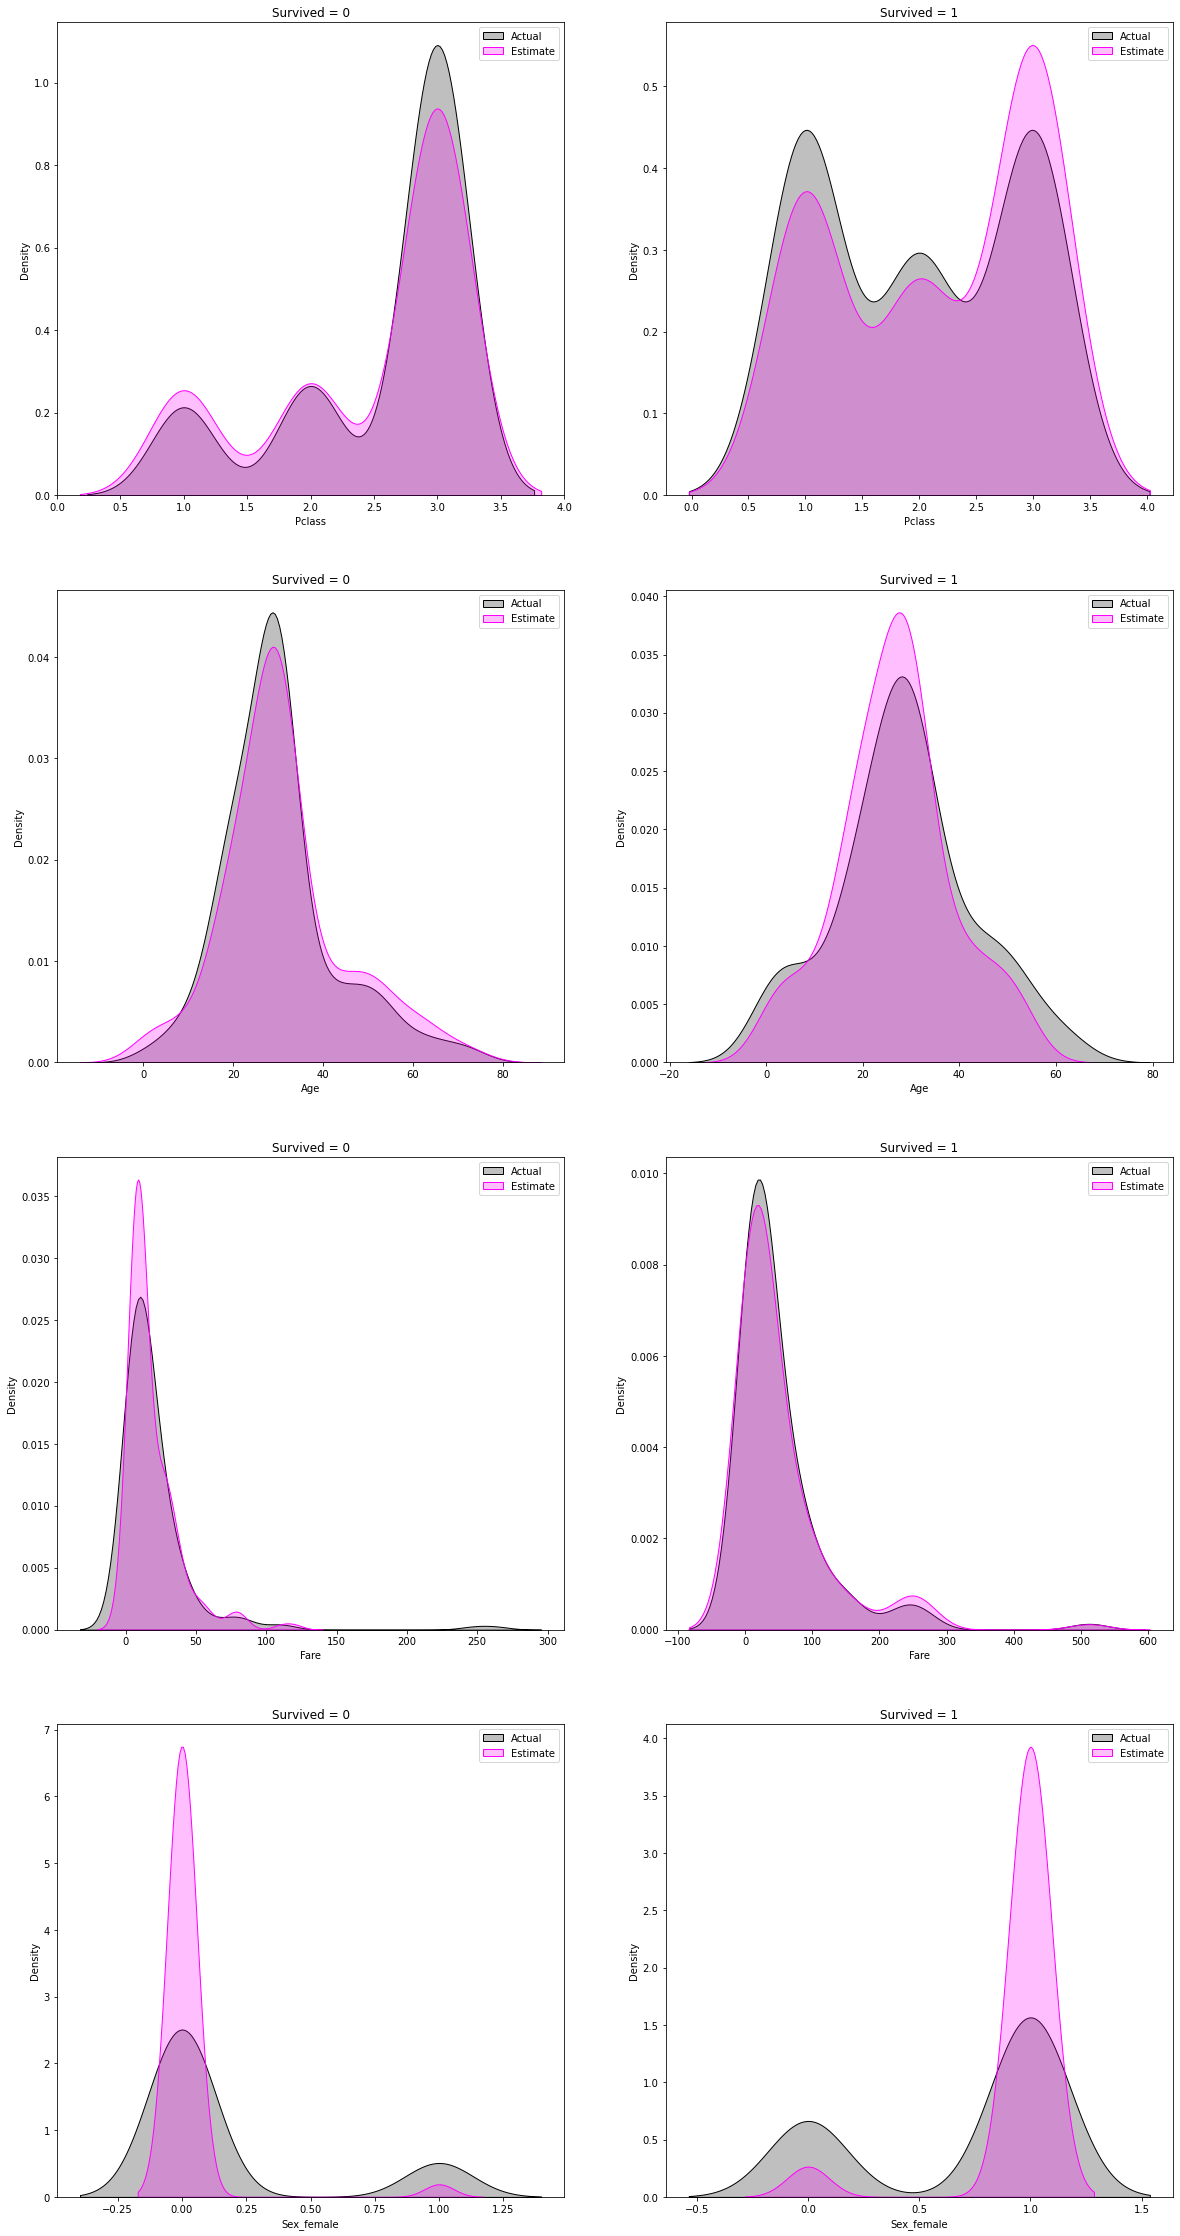

In [48]:
fig, axes = plt.subplots(len(x.columns),2, figsize=(20,40))
for i in enumerate(x_test_p.columns.drop(['Survived', 'pred', 'prob']).tolist()):
    axes[i[0],0].set_title("Survived = 0")
    sns.kdeplot(data = x_test_p[i[1]][x_test_p['Survived'] == 0], shade=True, label='Actual', color='Black', ax=axes[i[0],0])
    sns.kdeplot(data = x_test_p[i[1]][x_test_p['pred'] == 0], shade=True, label='Estimate', color='Magenta', ax=axes[i[0],0])
    axes[i[0],0].legend()
    axes[i[0],1].set_title("Survived = 1")
    sns.kdeplot(data = x_test_p[i[1]][x_test_p['Survived'] == 1], shade=True, label='Actual', color='Black', ax=axes[i[0],1])
    sns.kdeplot(data = x_test_p[i[1]][x_test_p['pred'] == 1], shade=True, label='Estimate', color='Magenta', ax=axes[i[0],1])
    axes[i[0],1].legend()

#### Cumulative Distribution Function

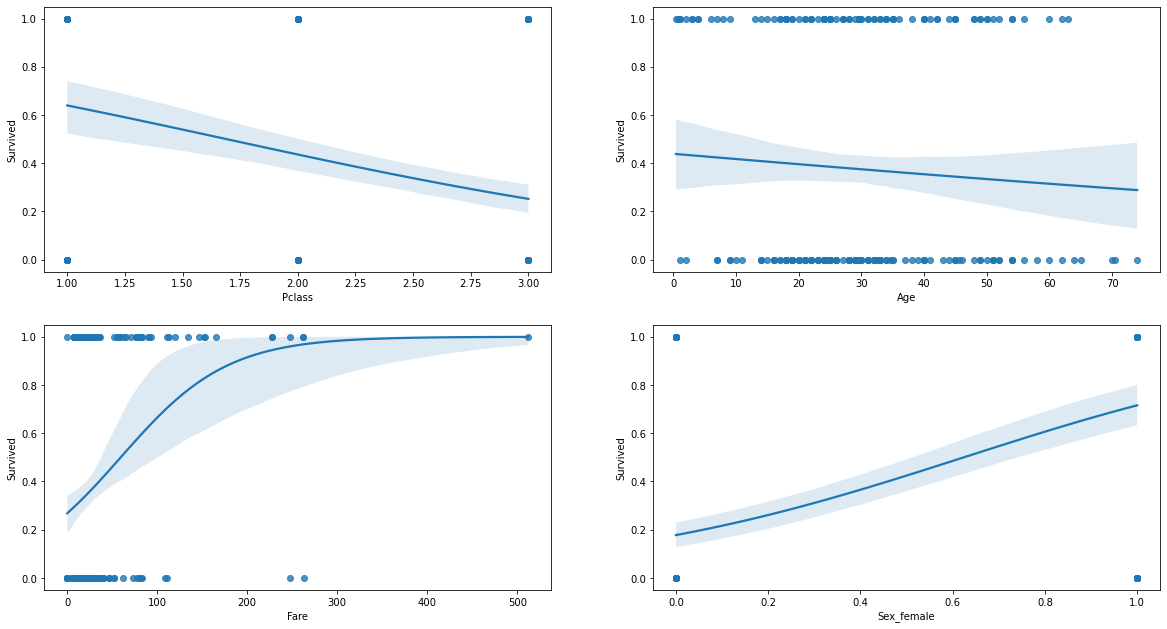

In [49]:
plt.figure(figsize = (20,40))
for i in enumerate(x_test_p.columns.drop(['Survived', 'pred', 'prob']).tolist()):
    plt.subplot(7,2,i[0]+1)
    sns.regplot(x=i[1], y='Survived', data=x_test_p, logistic=True)

## XGBoost Classifier

#### Define x & y Variables

In [50]:
x = data.filter(['Pclass', 'Age', 'Fare', 'Sex_female'], axis=1)
y = data['Survived']

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

#### Train/Test Split

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#### Define Model

In [53]:
''' fancy run
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')

def evaluate(_xgb):
    scores = cross_val_score(_xgb, x, y, scoring='accuracy', cv=10)
    print('Accuracy: {} ± {}'.format(np.mean(scores), np.std(scores)))
    _xgb.fit(x_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(x_test, y_test)]
            )

evaluate(xgb)
'''

" fancy run\nfrom xgboost import XGBClassifier\nfrom sklearn.model_selection import cross_val_score\n\nxgb = XGBClassifier(n_estimators=500, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')\n\ndef evaluate(_xgb):\n    scores = cross_val_score(_xgb, x, y, scoring='accuracy', cv=10)\n    print('Accuracy: {} ± {}'.format(np.mean(scores), np.std(scores)))\n    _xgb.fit(x_train, y_train,\n             early_stopping_rounds=5,\n             eval_set=[(x_test, y_test)]\n            )\n\nevaluate(xgb)\n"

In [54]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')

#### Fit Model

In [55]:
xgb_fit = xgb.fit(x_train, y_train, 
                  early_stopping_rounds=5,
                  eval_set=[(x_test, y_test)]
                 )

[0]	validation_0-logloss:0.66952
[1]	validation_0-logloss:0.64816
[2]	validation_0-logloss:0.62900
[3]	validation_0-logloss:0.61087
[4]	validation_0-logloss:0.59488
[5]	validation_0-logloss:0.57961
[6]	validation_0-logloss:0.56529
[7]	validation_0-logloss:0.55329
[8]	validation_0-logloss:0.54226
[9]	validation_0-logloss:0.53192
[10]	validation_0-logloss:0.52202
[11]	validation_0-logloss:0.51366
[12]	validation_0-logloss:0.50522
[13]	validation_0-logloss:0.49859
[14]	validation_0-logloss:0.49191
[15]	validation_0-logloss:0.48514
[16]	validation_0-logloss:0.47902
[17]	validation_0-logloss:0.47392
[18]	validation_0-logloss:0.46892
[19]	validation_0-logloss:0.46362
[20]	validation_0-logloss:0.45973
[21]	validation_0-logloss:0.45565
[22]	validation_0-logloss:0.45227
[23]	validation_0-logloss:0.44838
[24]	validation_0-logloss:0.44454
[25]	validation_0-logloss:0.44173
[26]	validation_0-logloss:0.43813
[27]	validation_0-logloss:0.43582
[28]	validation_0-logloss:0.43307
[29]	validation_0-loglos

#### Gather Predictions and Add to Data

In [56]:
xgb_y_pred = xgb.predict(x_test)
xgb_y_prob = xgb.predict_proba(x_test)
x_test_p['xgb_pred'] = xgb_y_pred.tolist()
x_test_p['xgb_prob'] = xgb_y_prob[:,1].tolist()

### Model Score

#### Cross-Validation

In [57]:
scores = cross_val_score(xgb, x, y, scoring='accuracy', cv=10)
print('Accuracy: {} ± {}'.format(np.mean(scores), np.std(scores)))

Accuracy: 0.8204619225967541 ± 0.042157064462986525


#### Accuracy

In [58]:
accuracy_score(y_test, xgb.predict(x_test))

0.8203389830508474

#### R-Squared

In [59]:
r2_score(y_test, xgb_y_pred)

0.234479044261653

#### Mean Squared Error

In [60]:
mean_squared_error(y_test, xgb_y_pred)

0.17966101694915254

#### Mean Absolute Error

In [61]:
mean_absolute_error(y_test, xgb_y_pred)

0.17966101694915254

#### Log Loss Score

In [62]:
log_loss(y_test, xgb_y_pred)

6.205331322283833

#### Confusion Matrix

In [63]:
confusion_matrix(y_test, xgb_y_pred)

array([[162,  22],
       [ 31,  80]])

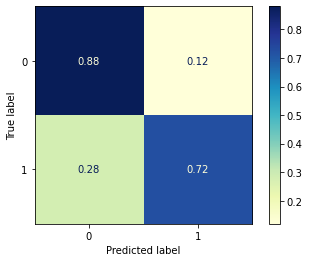

In [64]:
matrix = plot_confusion_matrix(xgb.fit(x_train, y_train), x_test, y_test,
                               cmap=plt.cm.YlGnBu,
                               normalize='true')

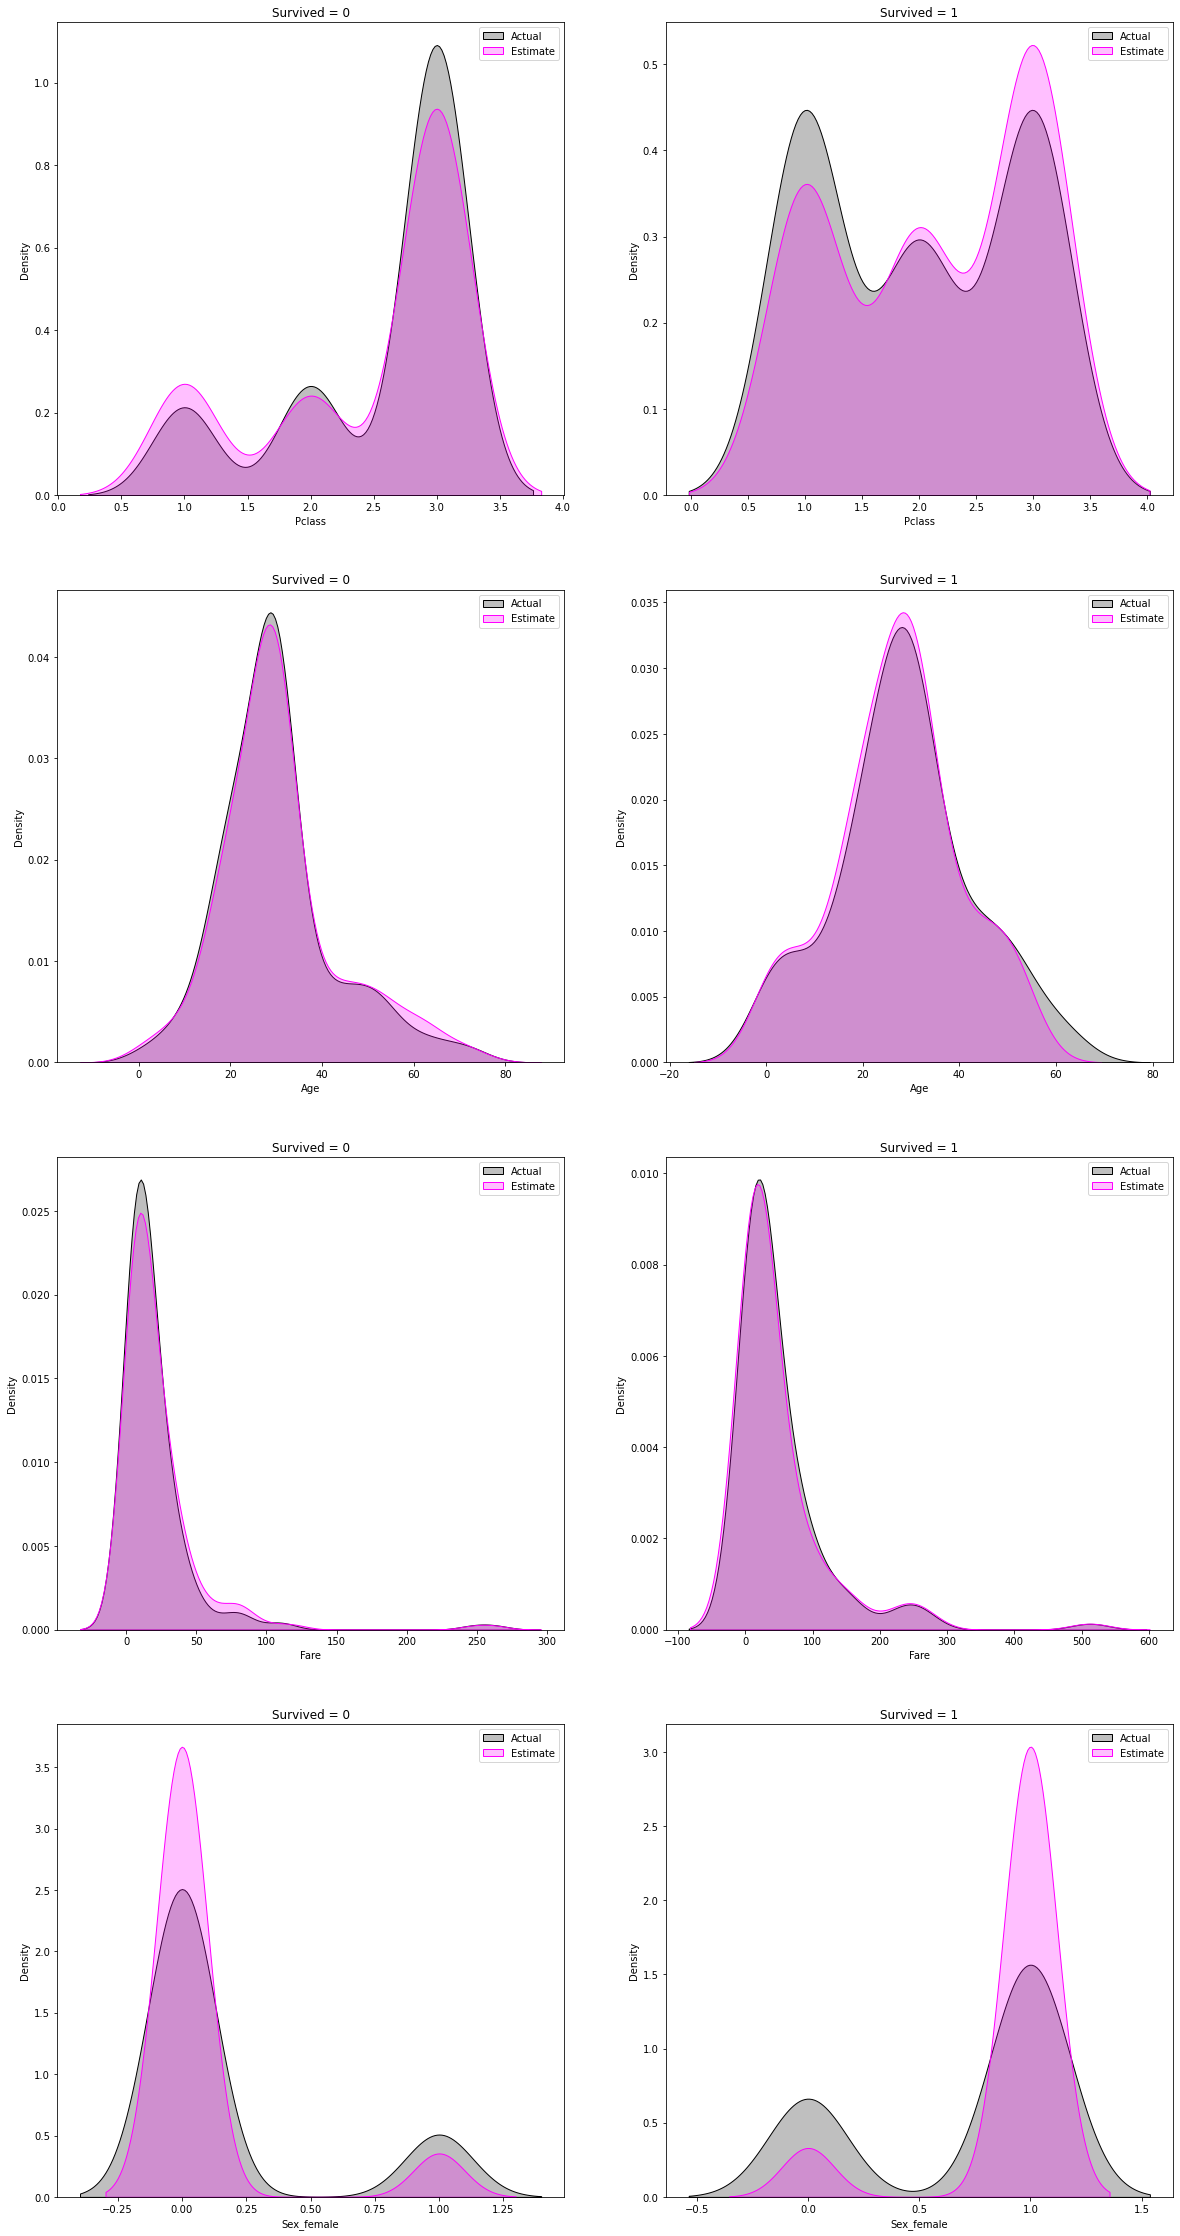

In [65]:
fig, axes = plt.subplots(len(x.columns),2, figsize=(20,40))
for i in enumerate(x_test_p.columns.drop(['Survived', 'pred', 'prob', 'xgb_pred', 'xgb_prob']).tolist()):
    axes[i[0],0].set_title("Survived = 0")
    sns.kdeplot(data = x_test_p[i[1]][x_test_p['Survived'] == 0], shade=True, label='Actual', color='Black', ax=axes[i[0],0])
    sns.kdeplot(data = x_test_p[i[1]][x_test_p['xgb_pred'] == 0], shade=True, label='Estimate', color='Magenta', ax=axes[i[0],0])
    axes[i[0],0].legend()
    axes[i[0],1].set_title("Survived = 1")
    sns.kdeplot(data = x_test_p[i[1]][x_test_p['Survived'] == 1], shade=True, label='Actual', color='Black', ax=axes[i[0],1])
    sns.kdeplot(data = x_test_p[i[1]][x_test_p['xgb_pred'] == 1], shade=True, label='Estimate', color='Magenta', ax=axes[i[0],1])
    axes[i[0],1].legend()

#### View Booster

In [66]:
booster = xgb.get_booster()
original_feature_names = booster.feature_names
print(booster.get_dump()[0])

0:[Sex_female<1] yes=1,no=2,missing=1
	1:[Age<14] yes=3,no=4,missing=3
		3:[Pclass<3] yes=7,no=8,missing=7
			7:leaf=0.0714285746
			8:[Fare<20.7999992] yes=13,no=14,missing=13
				13:leaf=0.0400000028
				14:leaf=-0.0733333379
		4:[Pclass<2] yes=9,no=10,missing=9
			9:[Age<53] yes=15,no=16,missing=15
				15:[Age<47.5] yes=19,no=20,missing=19
					19:[Age<28.5] yes=25,no=26,missing=25
						25:leaf=0.00588235306
						26:leaf=-0.0346938781
					20:[Age<49.5] yes=27,no=28,missing=27
						27:leaf=0.0500000007
						28:leaf=-0.0111111114
				16:leaf=-0.0647058859
			10:leaf=-0.0756944418
	2:[Pclass<3] yes=5,no=6,missing=5
		5:leaf=0.0836065635
		6:[Fare<23.3500004] yes=11,no=12,missing=11
			11:[Age<29.8495598] yes=17,no=18,missing=17
				17:[Fare<7.88749981] yes=21,no=22,missing=21
					21:leaf=0.0571428612
					22:[Fare<9.00625038] yes=29,no=30,missing=29
						29:leaf=-0.0272727292
						30:leaf=0.0266666692
				18:[Fare<8.6729002] yes=23,no=24,missing=23
					23:leaf=-0.0500000007
		

#### Feature Weights

In [67]:
from eli5 import show_weights
show_weights(xgb, vec=original_feature_names)

Weight,Feature
0.7257,Sex_female
0.1804,Pclass
0.0470,Age
0.0469,Fare


In [70]:
from eli5 import show_prediction

for idx in [4, 5, 7, 37, 81]:
    display(show_prediction(xgb, x_test.iloc[idx], show_feature_values=True))

In [73]:
# Will I Survive?
Pclass = 2
Age = 29
Fare = 117
Female = 0

wis = pd.DataFrame({'Pclass': [Pclass], 'Age': [Age],'Fare':  [Fare], 'Sex_female': [Female]})

show_prediction(xgb, wis.loc[0], show_feature_values=True)